In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()
pd.options.display.max_columns = 999

In [2]:
filename_train_data = "Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv"
filename_train_label = "Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv"
filename_test_data = "Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv"

In [3]:
# import csv data while changing dtypes
testData = pd.read_csv(filename_test_data, 
                        dtype={
                            'land_surface_condition': 'category',
                            'foundation_type': 'category',
                            'roof_type': 'category',
                            'ground_floor_type': 'category',
                            'other_floor_type': 'category',
                            'position': 'category',
                            'plan_configuration': 'category',
                            'has_superstructure_adobe_mud': 'bool',
                            'has_superstructure_mud_mortar_stone': 'bool',
                            'has_superstructure_stone_flag': 'bool',
                            'has_superstructure_cement_mortar_stone': 'bool',
                            'has_superstructure_mud_mortar_brick': 'bool',
                            'has_superstructure_cement_mortar_brick': 'bool',
                            'has_superstructure_timber': 'bool',
                            'has_superstructure_bamboo': 'bool',
                            'has_superstructure_rc_non_engineered': 'bool',
                            'has_superstructure_rc_engineered': 'bool',
                            'has_superstructure_other': 'bool',
                            'legal_ownership_status': 'category',
                            'has_secondary_use': 'bool',
                            'has_secondary_use_agriculture': 'bool',
                            'has_secondary_use_hotel': 'bool',
                            'has_secondary_use_rental': 'bool',
                            'has_secondary_use_institution': 'bool',
                            'has_secondary_use_school': 'bool',
                            'has_secondary_use_industry': 'bool',
                            'has_secondary_use_health_post': 'bool',
                            'has_secondary_use_gov_office': 'bool',
                            'has_secondary_use_use_police': 'bool',
                            'has_secondary_use_other': 'bool'
                        })

In [4]:
# import csv data while changing dtypes
trainData = pd.read_csv(filename_train_data, 
                        dtype={
                            'land_surface_condition': 'category',
                            'foundation_type': 'category',
                            'roof_type': 'category',
                            'ground_floor_type': 'category',
                            'other_floor_type': 'category',
                            'position': 'category',
                            'plan_configuration': 'category',
                            'has_superstructure_adobe_mud': 'bool',
                            'has_superstructure_mud_mortar_stone': 'bool',
                            'has_superstructure_stone_flag': 'bool',
                            'has_superstructure_cement_mortar_stone': 'bool',
                            'has_superstructure_mud_mortar_brick': 'bool',
                            'has_superstructure_cement_mortar_brick': 'bool',
                            'has_superstructure_timber': 'bool',
                            'has_superstructure_bamboo': 'bool',
                            'has_superstructure_rc_non_engineered': 'bool',
                            'has_superstructure_rc_engineered': 'bool',
                            'has_superstructure_other': 'bool',
                            'legal_ownership_status': 'category',
                            'has_secondary_use': 'bool',
                            'has_secondary_use_agriculture': 'bool',
                            'has_secondary_use_hotel': 'bool',
                            'has_secondary_use_rental': 'bool',
                            'has_secondary_use_institution': 'bool',
                            'has_secondary_use_school': 'bool',
                            'has_secondary_use_industry': 'bool',
                            'has_secondary_use_health_post': 'bool',
                            'has_secondary_use_gov_office': 'bool',
                            'has_secondary_use_use_police': 'bool',
                            'has_secondary_use_other': 'bool'
                        })
trainLabel = pd.read_csv(filename_train_label)

In [5]:
trainData.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                          True   
1                q        s                  d                         False   
2                x        t                  d                         False   
3                x        s                  d                         False   
4                x        s                  d                          True   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                 True                          False   
1                                 True                          False   
2                                 True                          False   
3                                 True                          False   
4                                False                          False   

   has_superstructure_cement_mortar_stone  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   has_superstructure_mud_mortar_brick  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                   False                      False   
1                                   False                      False   
2                                   False                      False   
3                                   False                       True   
4                                   False                      False   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                      False                                 False   
1                      False                                 False   
2                      False                                 False   
3                       True                                 False   
4                      False                                 False   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                             False                     False   
1                             False                     False   
2                             False                     False   
3                             False                     False   
4                             False                     False   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [6]:
trainLabel.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [7]:
# change the index of the dataframes to be building_id
trainData.set_index('building_id', inplace=True)
testData.set_index('building_id', inplace=True)
trainLabel.set_index('building_id', inplace=True)

In [8]:
# resort the dataframes by their new index
trainData.sort_index(inplace=True)
testData.sort_index(inplace=True)
trainLabel.sort_index(inplace=True)

In [15]:
trainData.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
4                        30             266            1224   
8                        17             409           12182   
12                       17             716            7056   
16                        4             651             105   
17                        3            1387            3909   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
4                              1   25                5                  2   
8                              2    0               13                  7   
12                             2    5               12                  6   
16                             2   80                5                  4   
17                             5   40                5                 10   

            land_surface_condition foundation_type roof_type  \
building_id                                                    
4                                t               r         n   
8                                t               r         n   
12                               o               r         q   
16                               n               r         n   
17                               t               r         n   

            ground_floor_type other_floor_type position plan_configuration  \
building_id                                                                  
4                           f                j        s                  d   
8                           f                q        s                  d   
12                          f                q        s                  d   
16                          f                q        s                  d   
17                          f                q        o                  d   

             has_superstructure_adobe_mud  \
building_id                                 
4                                   False   
8                                   False   
12                                  False   
16                                  False   
17                                  False   

             has_superstructure_mud_mortar_stone  \
building_id                                        
4                                           True   
8                                           True   
12                                          True   
16                                          True   
17                                         False   

             has_superstructure_stone_flag  \
building_id                                  
4                                    False   
8                                    False   
12                                   False   
16                                   False   
17                                   False   

             has_superstructure_cement_mortar_stone  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_mud_mortar_brick  \
building_id                                        
4                                          False   
8                                          False   
12                                         False   
16                                         False   
17                                          True   

             has_superstructure_cement_mortar_brick  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16   

In [17]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 38 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null category
foundation_type                           260601 non-null category
roof_type                                 260601 non-null category
ground_floor_type                         260601 non-null category
other_floor_type                          260601 non-null category
position                                  260601 non-null category
plan_configuration                    

In [18]:
trainLabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 1 columns):
damage_grade    260601 non-null int64
dtypes: int64(1)
memory usage: 4.0 MB


In [9]:
trainDataMerged = trainData.join(trainLabel)
trainDataMerged.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
4                        30             266            1224   
8                        17             409           12182   
12                       17             716            7056   
16                        4             651             105   
17                        3            1387            3909   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
4                              1   25                5                  2   
8                              2    0               13                  7   
12                             2    5               12                  6   
16                             2   80                5                  4   
17                             5   40                5                 10   

            land_surface_condition foundation_type roof_type  \
building_id                                                    
4                                t               r         n   
8                                t               r         n   
12                               o               r         q   
16                               n               r         n   
17                               t               r         n   

            ground_floor_type other_floor_type position plan_configuration  \
building_id                                                                  
4                           f                j        s                  d   
8                           f                q        s                  d   
12                          f                q        s                  d   
16                          f                q        s                  d   
17                          f                q        o                  d   

             has_superstructure_adobe_mud  \
building_id                                 
4                                   False   
8                                   False   
12                                  False   
16                                  False   
17                                  False   

             has_superstructure_mud_mortar_stone  \
building_id                                        
4                                           True   
8                                           True   
12                                          True   
16                                          True   
17                                         False   

             has_superstructure_stone_flag  \
building_id                                  
4                                    False   
8                                    False   
12                                   False   
16                                   False   
17                                   False   

             has_superstructure_cement_mortar_stone  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_mud_mortar_brick  \
building_id                                        
4                                          False   
8                                          False   
12                                         False   
16                                         False   
17                                          True   

             has_superstructure_cement_mortar_brick  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16   

We have the following DataFrames: `trainData`, `trainLabel`, `trainDataMerged`, and `testData`


Now, we will do some exploration of the features of the data.

In [20]:
trainData.describe().round(0)

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
count        260601.0        260601.0        260601.0             260601.0   
mean             14.0           701.0          6258.0                  2.0   
std               8.0           413.0          3646.0                  1.0   
min               0.0             0.0             0.0                  1.0   
25%               7.0           350.0          3073.0                  2.0   
50%              12.0           702.0          6270.0                  2.0   
75%              21.0          1050.0          9412.0                  2.0   
max              30.0          1427.0         12567.0                  9.0   

            age  area_percentage  height_percentage  count_families  
count  260601.0         260601.0           260601.0        260601.0  
mean       27.0              8.0                5.0             1.0  
std        74.0              4.0                2.0             0.0  
min         0.0              1.0                2.0             0.0  
25%        10.0              5.0                4.0             1.0  
50%        15.0              7.0                5.0             1.0  
75%        30.0              9.0                6.0             1.0  
max       995.0            100.0               32.0             9.0

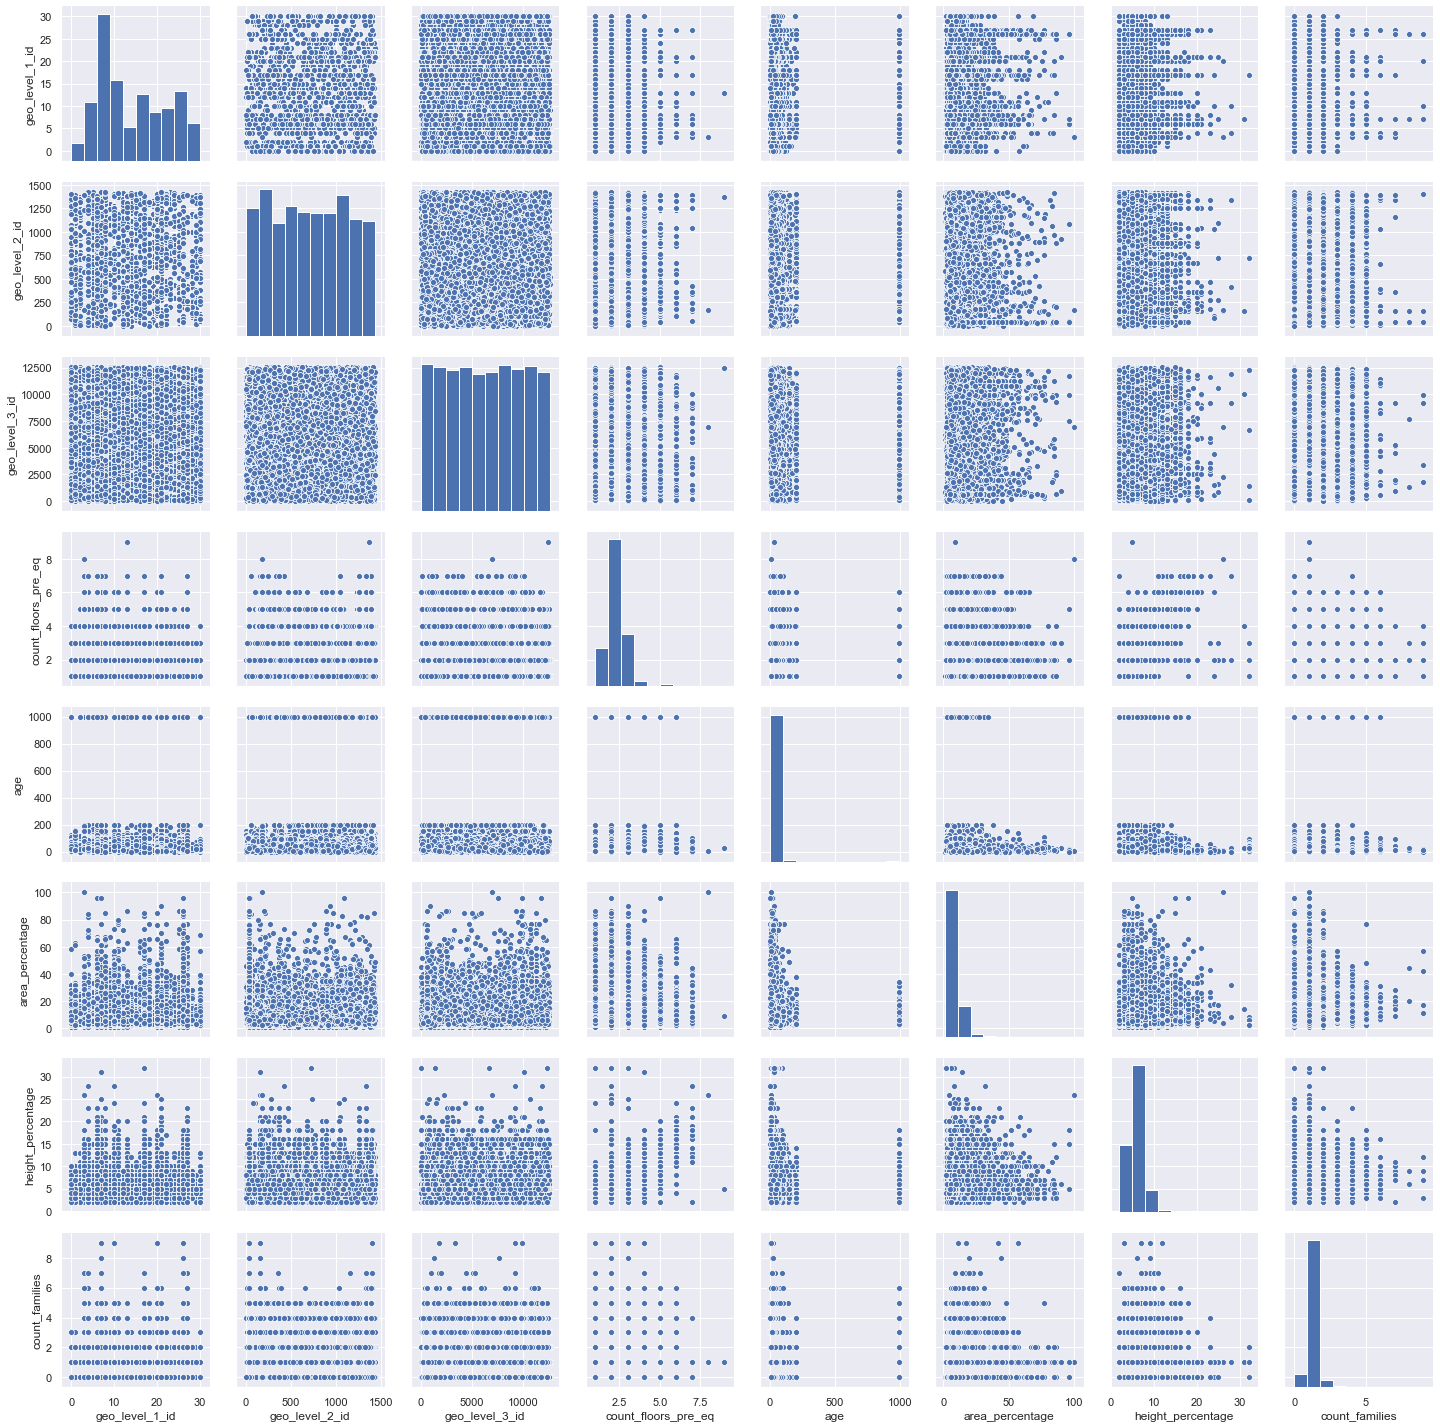

In [14]:
sb.pairplot(data = trainData[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id',
                            'count_floors_pre_eq', 'age', 'area_percentage',
                            'height_percentage', 'count_families']])

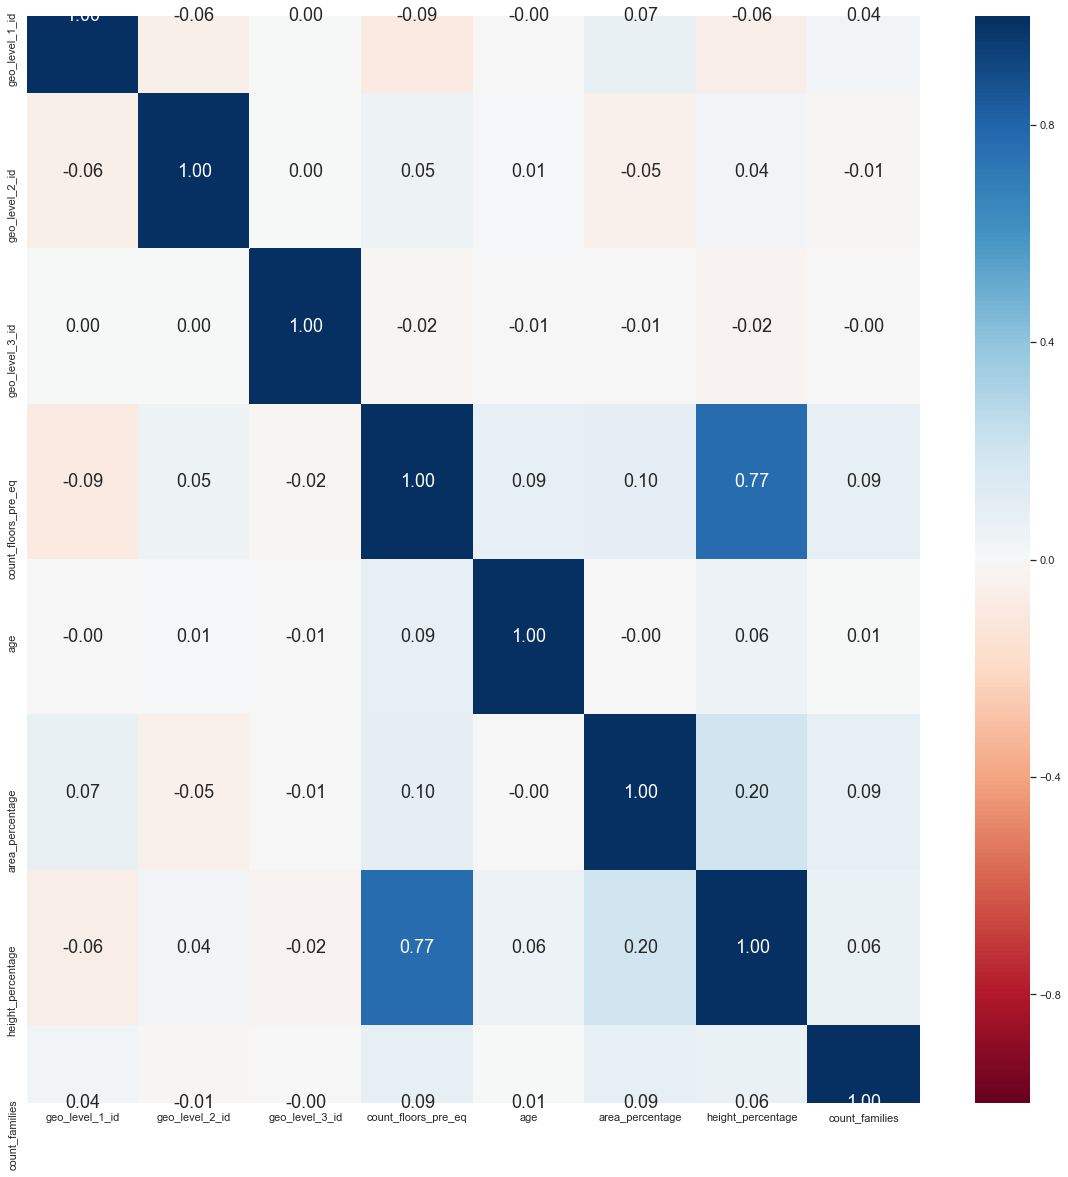

In [15]:
f, axes = plt.subplots(1,1, figsize=(20,20))
sb.heatmap(data = trainData[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id',
                            'count_floors_pre_eq', 'age', 'area_percentage',
                            'height_percentage', 'count_families']].corr(),
          cmap = "RdBu", annot = True, fmt = ".2f", annot_kws = {'size': 18},
          vmin = -1, vmax = 1)

Here we can see that `count_floors_pre_eq` and `height_percentage` are highly correlated to one another, which is expected as more floors usually correlates to a taller building.

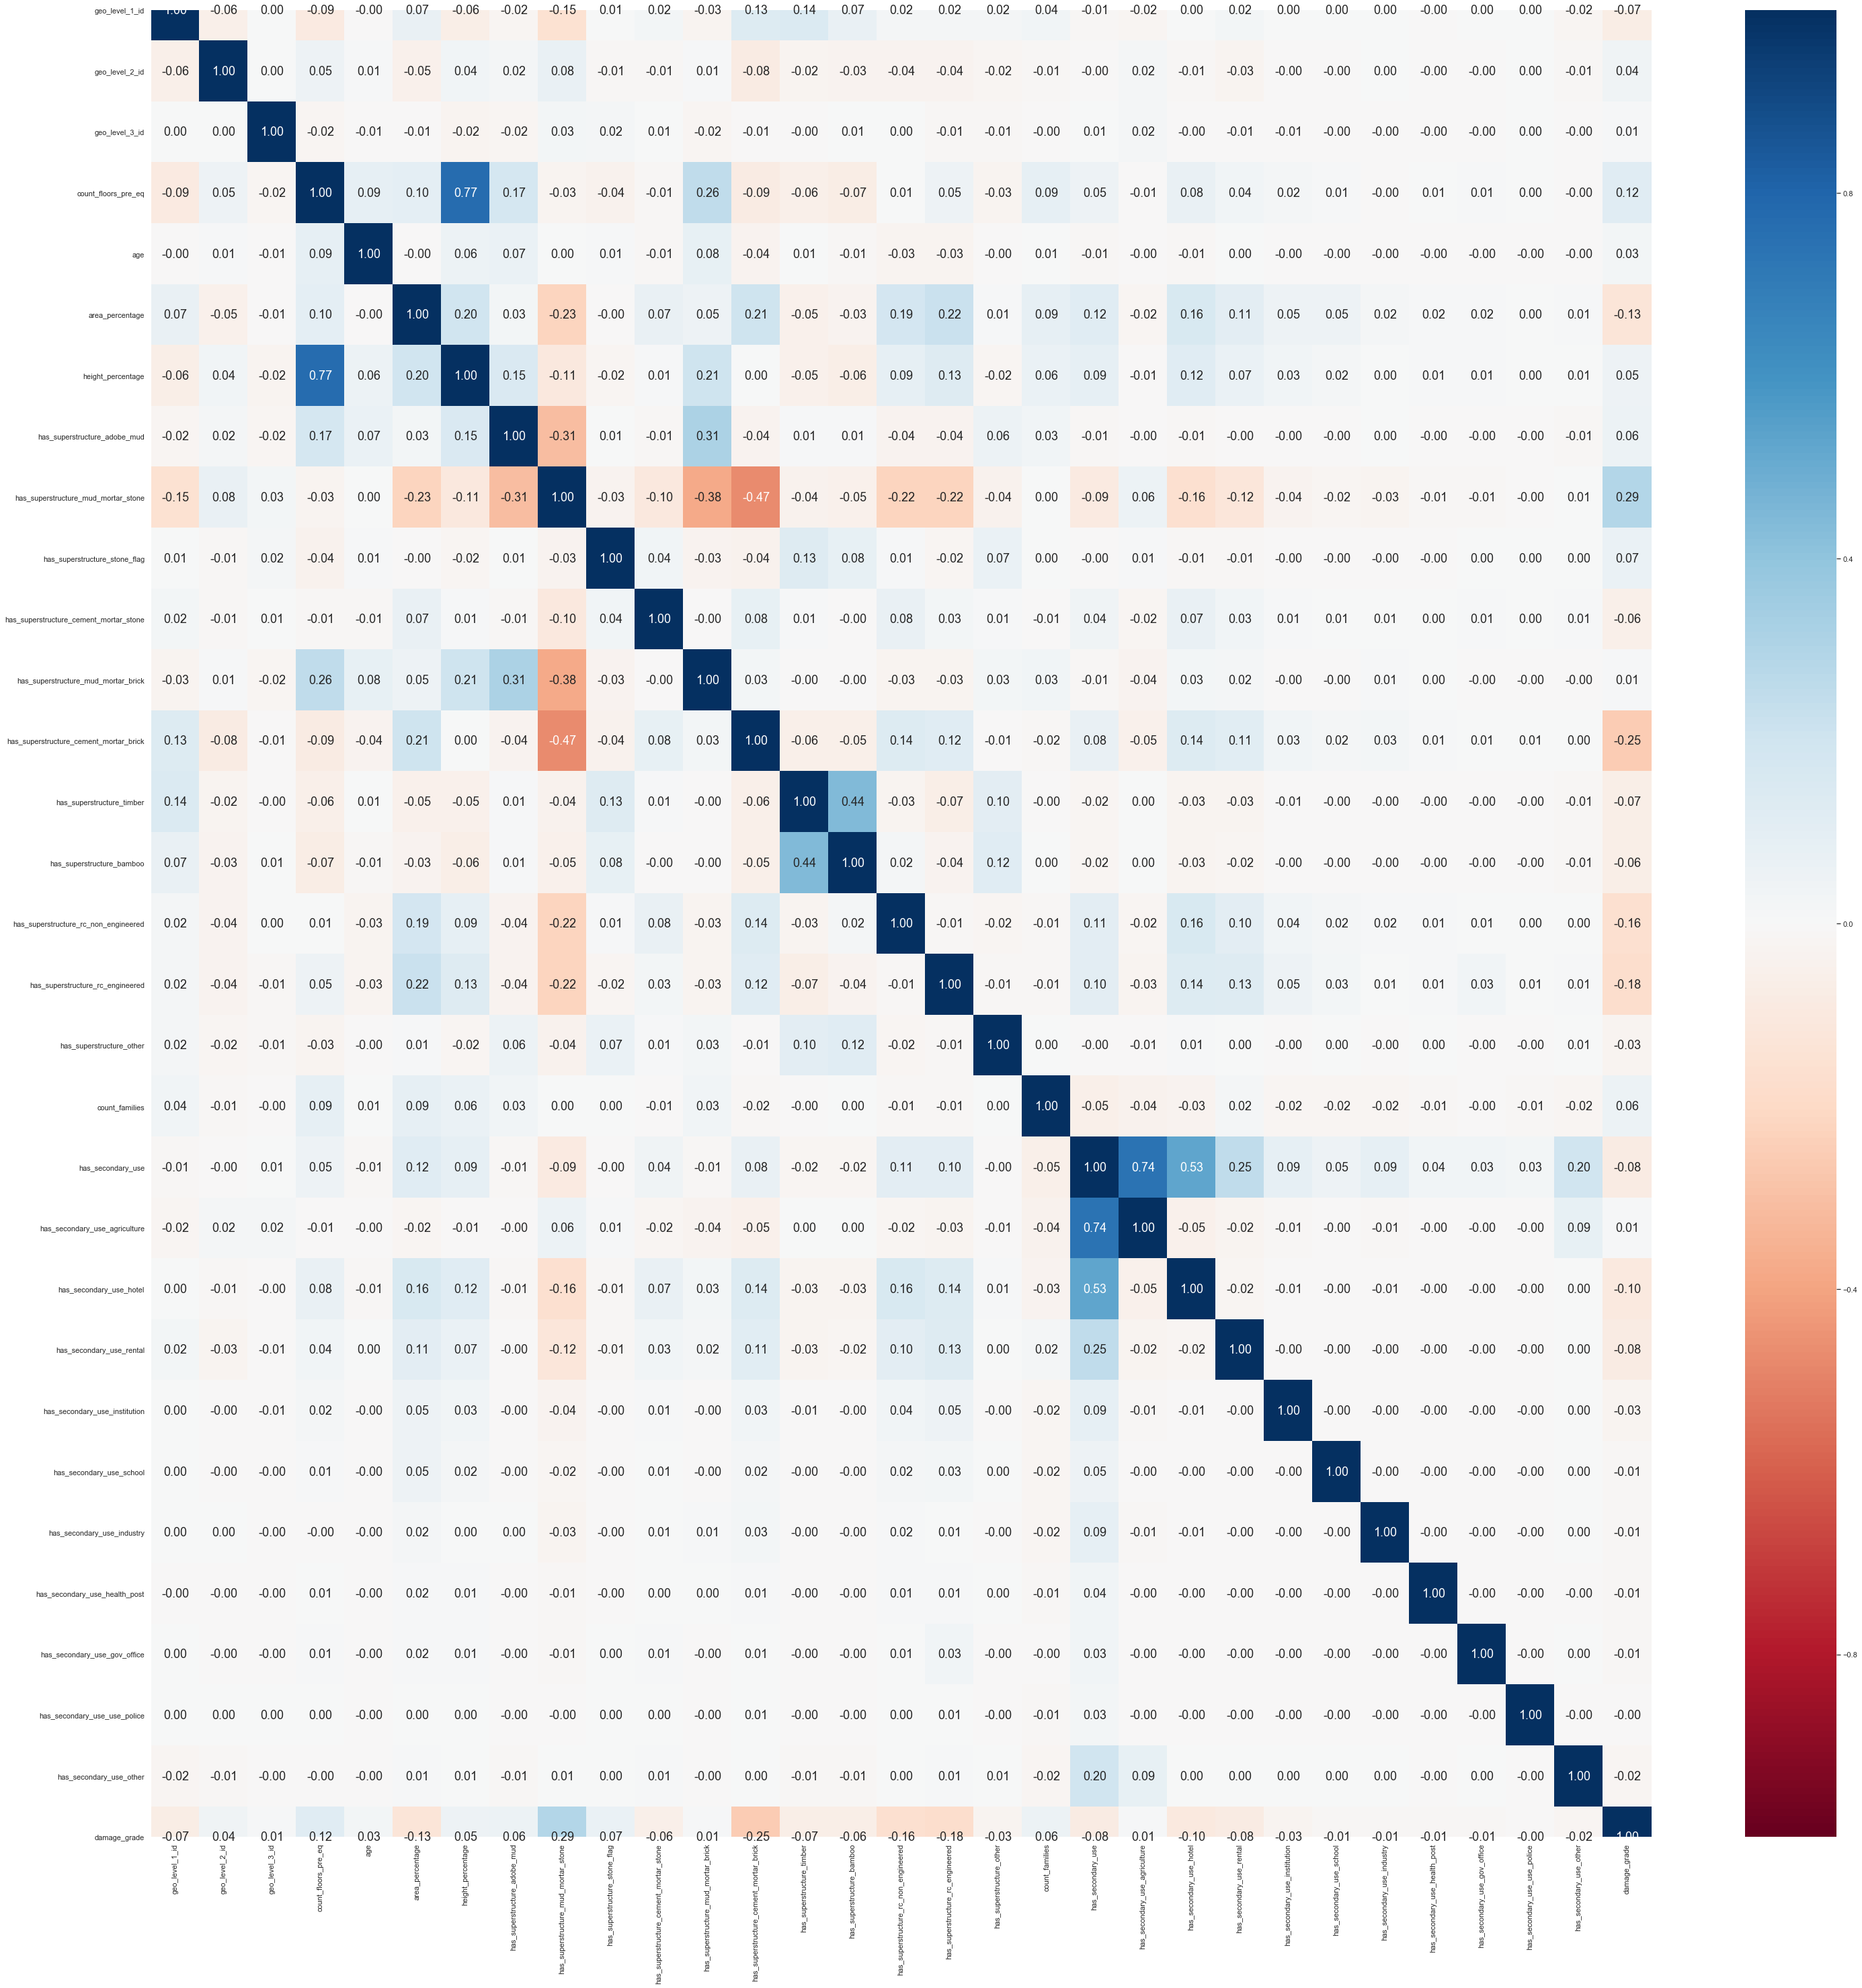

In [16]:
f, axes = plt.subplots(1,1, figsize=(50,50))
sb.heatmap(data = trainDataMerged.corr(),
          cmap = "RdBu", annot = True, fmt = ".2f", annot_kws = {'size': 18},
          vmin = -1, vmax = 1)

In [17]:
trainDataMerged.loc[trainData['age'] == 995]['damage_grade'].value_counts()

2    822
3    389
1    179
Name: damage_grade, dtype: int64

59.14% of age 995 suffered damage_grade 2. <br>
27.99% of age 995 suffered damage_grade 3.

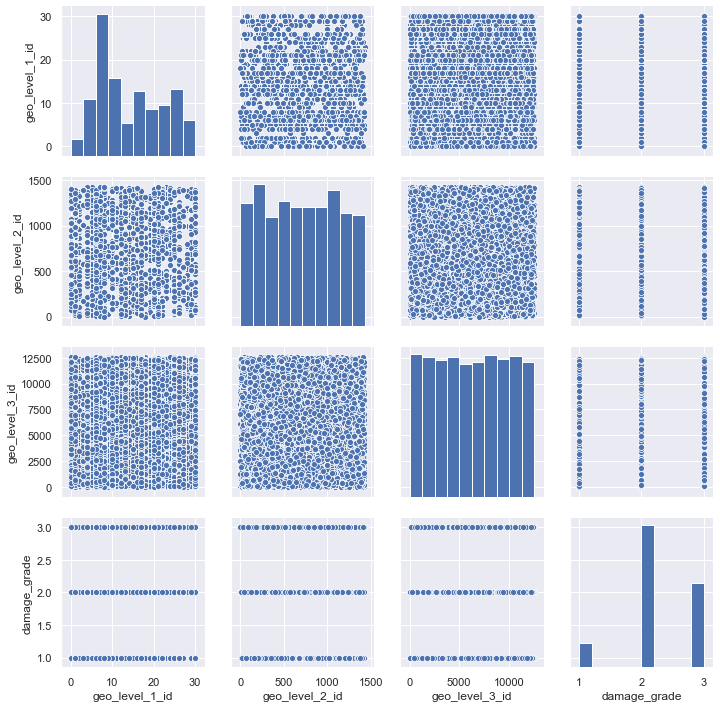

In [18]:
sb.pairplot(data = trainDataMerged[['geo_level_1_id','geo_level_2_id', 'geo_level_3_id','damage_grade']])

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
enc = OneHotEncoder(handle_unknown ='ignore')

In [12]:
categorical_columns =['land_surface_condition', 'foundation_type', 'roof_type', 
                   'ground_floor_type', 'other_floor_type', 'position', 
                   'plan_configuration', 'legal_ownership_status']

In [13]:
enc.fit(trainData[categorical_columns])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [14]:
enc.categories_

[array(['n', 'o', 't'], dtype=object),
 array(['h', 'i', 'r', 'u', 'w'], dtype=object),
 array(['n', 'q', 'x'], dtype=object),
 array(['f', 'm', 'v', 'x', 'z'], dtype=object),
 array(['j', 'q', 's', 'x'], dtype=object),
 array(['j', 'o', 's', 't'], dtype=object),
 array(['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'], dtype=object),
 array(['a', 'r', 'v', 'w'], dtype=object)]

In [15]:
oneHotEncoded = pd.DataFrame(enc.transform(trainData[categorical_columns]).toarray().astype('bool')
                                           ).rename( columns = {
        0: 'land_surface_condition_n', 1: 'land_surface_condition_o',
        2: 'land_surface_condition_t', 3: 'foundation_type_h',
        4: 'foundation_type_i', 5: 'foundation_type_r',
        6: 'foundation_type_u', 7: 'foundation_type_w',
        8: 'roof_type_n', 9: 'roof_type_q',
        10: 'roof_type_x', 11: 'ground_floor_type_f',
        12: 'ground_floor_type_m', 13: 'ground_floor_type_v',
        14: 'ground_floor_type_x', 15: 'ground_floor_type_z',
        16: 'other_floor_type_j', 17: 'other_floor_type_q',
        18: 'other_floor_type_s', 19: 'other_floor_type_x',
        20: 'position_j', 21: 'position_o',
        22: 'position_s', 23: 'position_t',
        24: 'plan_configuration_a', 25: 'plan_configuration_c',
        26: 'plan_configuration_d', 27: 'plan_configuration_f',
        28: 'plan_configuration_m', 29: 'plan_configuration_n',
        30: 'plan_configuration_o', 31: 'plan_configuration_q',
        32: 'plan_configuration_s', 33: 'plan_configuration_u',
        34: 'legal_ownership_status_a', 35: 'legal_ownership_status_r',
        36: 'legal_ownership_status_v', 37: 'legal_ownership_status_w'
})

In [16]:
trainDataWithoutCat = trainData.drop(categorical_columns,axis=1)

In [17]:
tempdf = trainDataWithoutCat.reset_index()

In [18]:
trainDataWithOneHot = tempdf.join(oneHotEncoded)
trainDataWithOneHot.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            4              30             266            1224   
1            8              17             409           12182   
2           12              17             716            7056   
3           16               4             651             105   
4           17               3            1387            3909   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    1   25                5                  2   
1                    2    0               13                  7   
2                    2    5               12                  6   
3                    2   80                5                  4   
4                    5   40                5                 10   

   has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                         False                                 True   
1                         False                                 True   
2                         False                                 True   
3                         False                                 True   
4                         False                                False   

   has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                          False                                   False   
1                          False                                   False   
2                          False                                   False   
3                          False                                   False   
4                          False                                   False   

   has_superstructure_mud_mortar_brick  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                 True   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                   False                      False   
1                                   False                      False   
2                                   False                      False   
3                                   False                      False   
4                                   False                      False   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                      False                                 False   
1                      False                                 False   
2                      False                                 False   
3                      False                                 False   
4                      False                                 False   

   has_superstructure_rc_engineered  has_superstructure_other  count_families  \
0                             False                     False               0   
1                             False                     False               1   
2                             False                     False               1   
3                             False                     False               1   
4                             False                     False               1   

   has_secondary_use  has_secondary_use_agriculture  has_secondary_use_hotel  \
0              False                          False                    False   
1              False                          False                    False   
2              False                          False                    False   
3              False                          False                    False   
4              False                          False                    False   

   has_secondary_use_rental  has_secondary_use_institution  \
0                     False                          False   
1                     False                          False   
2                     False                         

In [19]:
trainDataWithOneHot.set_index('building_id', inplace=True)
trainDataWithOneHot.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
4                        30             266            1224   
8                        17             409           12182   
12                       17             716            7056   
16                        4             651             105   
17                        3            1387            3909   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
4                              1   25                5                  2   
8                              2    0               13                  7   
12                             2    5               12                  6   
16                             2   80                5                  4   
17                             5   40                5                 10   

             has_superstructure_adobe_mud  \
building_id                                 
4                                   False   
8                                   False   
12                                  False   
16                                  False   
17                                  False   

             has_superstructure_mud_mortar_stone  \
building_id                                        
4                                           True   
8                                           True   
12                                          True   
16                                          True   
17                                         False   

             has_superstructure_stone_flag  \
building_id                                  
4                                    False   
8                                    False   
12                                   False   
16                                   False   
17                                   False   

             has_superstructure_cement_mortar_stone  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_mud_mortar_brick  \
building_id                                        
4                                          False   
8                                          False   
12                                         False   
16                                         False   
17                                          True   

             has_superstructure_cement_mortar_brick  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_timber  has_superstructure_bamboo  \
building_id                                                         
4                                False                      False   
8                                False                      False   
12                               False                      False   
16                               False                      False   
17                               False                      False   

             has_superstructure_rc_non_engineered  \
building_id                                         
4                                           False   
8                                           False   
12                                          False   
16                                          False   
17                                          False   

             has_superstructure_rc

In [20]:
trainDataWithOneHotMerged = trainDataWithOneHot.join(trainLabel)

In [21]:
trainDataWithOneHotMerged.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
4                        30             266            1224   
8                        17             409           12182   
12                       17             716            7056   
16                        4             651             105   
17                        3            1387            3909   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
4                              1   25                5                  2   
8                              2    0               13                  7   
12                             2    5               12                  6   
16                             2   80                5                  4   
17                             5   40                5                 10   

             has_superstructure_adobe_mud  \
building_id                                 
4                                   False   
8                                   False   
12                                  False   
16                                  False   
17                                  False   

             has_superstructure_mud_mortar_stone  \
building_id                                        
4                                           True   
8                                           True   
12                                          True   
16                                          True   
17                                         False   

             has_superstructure_stone_flag  \
building_id                                  
4                                    False   
8                                    False   
12                                   False   
16                                   False   
17                                   False   

             has_superstructure_cement_mortar_stone  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_mud_mortar_brick  \
building_id                                        
4                                          False   
8                                          False   
12                                         False   
16                                         False   
17                                          True   

             has_superstructure_cement_mortar_brick  \
building_id                                           
4                                             False   
8                                             False   
12                                            False   
16                                            False   
17                                            False   

             has_superstructure_timber  has_superstructure_bamboo  \
building_id                                                         
4                                False                      False   
8                                False                      False   
12                               False                      False   
16                               False                      False   
17                               False                      False   

             has_superstructure_rc_non_engineered  \
building_id                                         
4                                           False   
8                                           False   
12                                          False   
16                                          False   
17                                          False   

             has_superstructure_rc

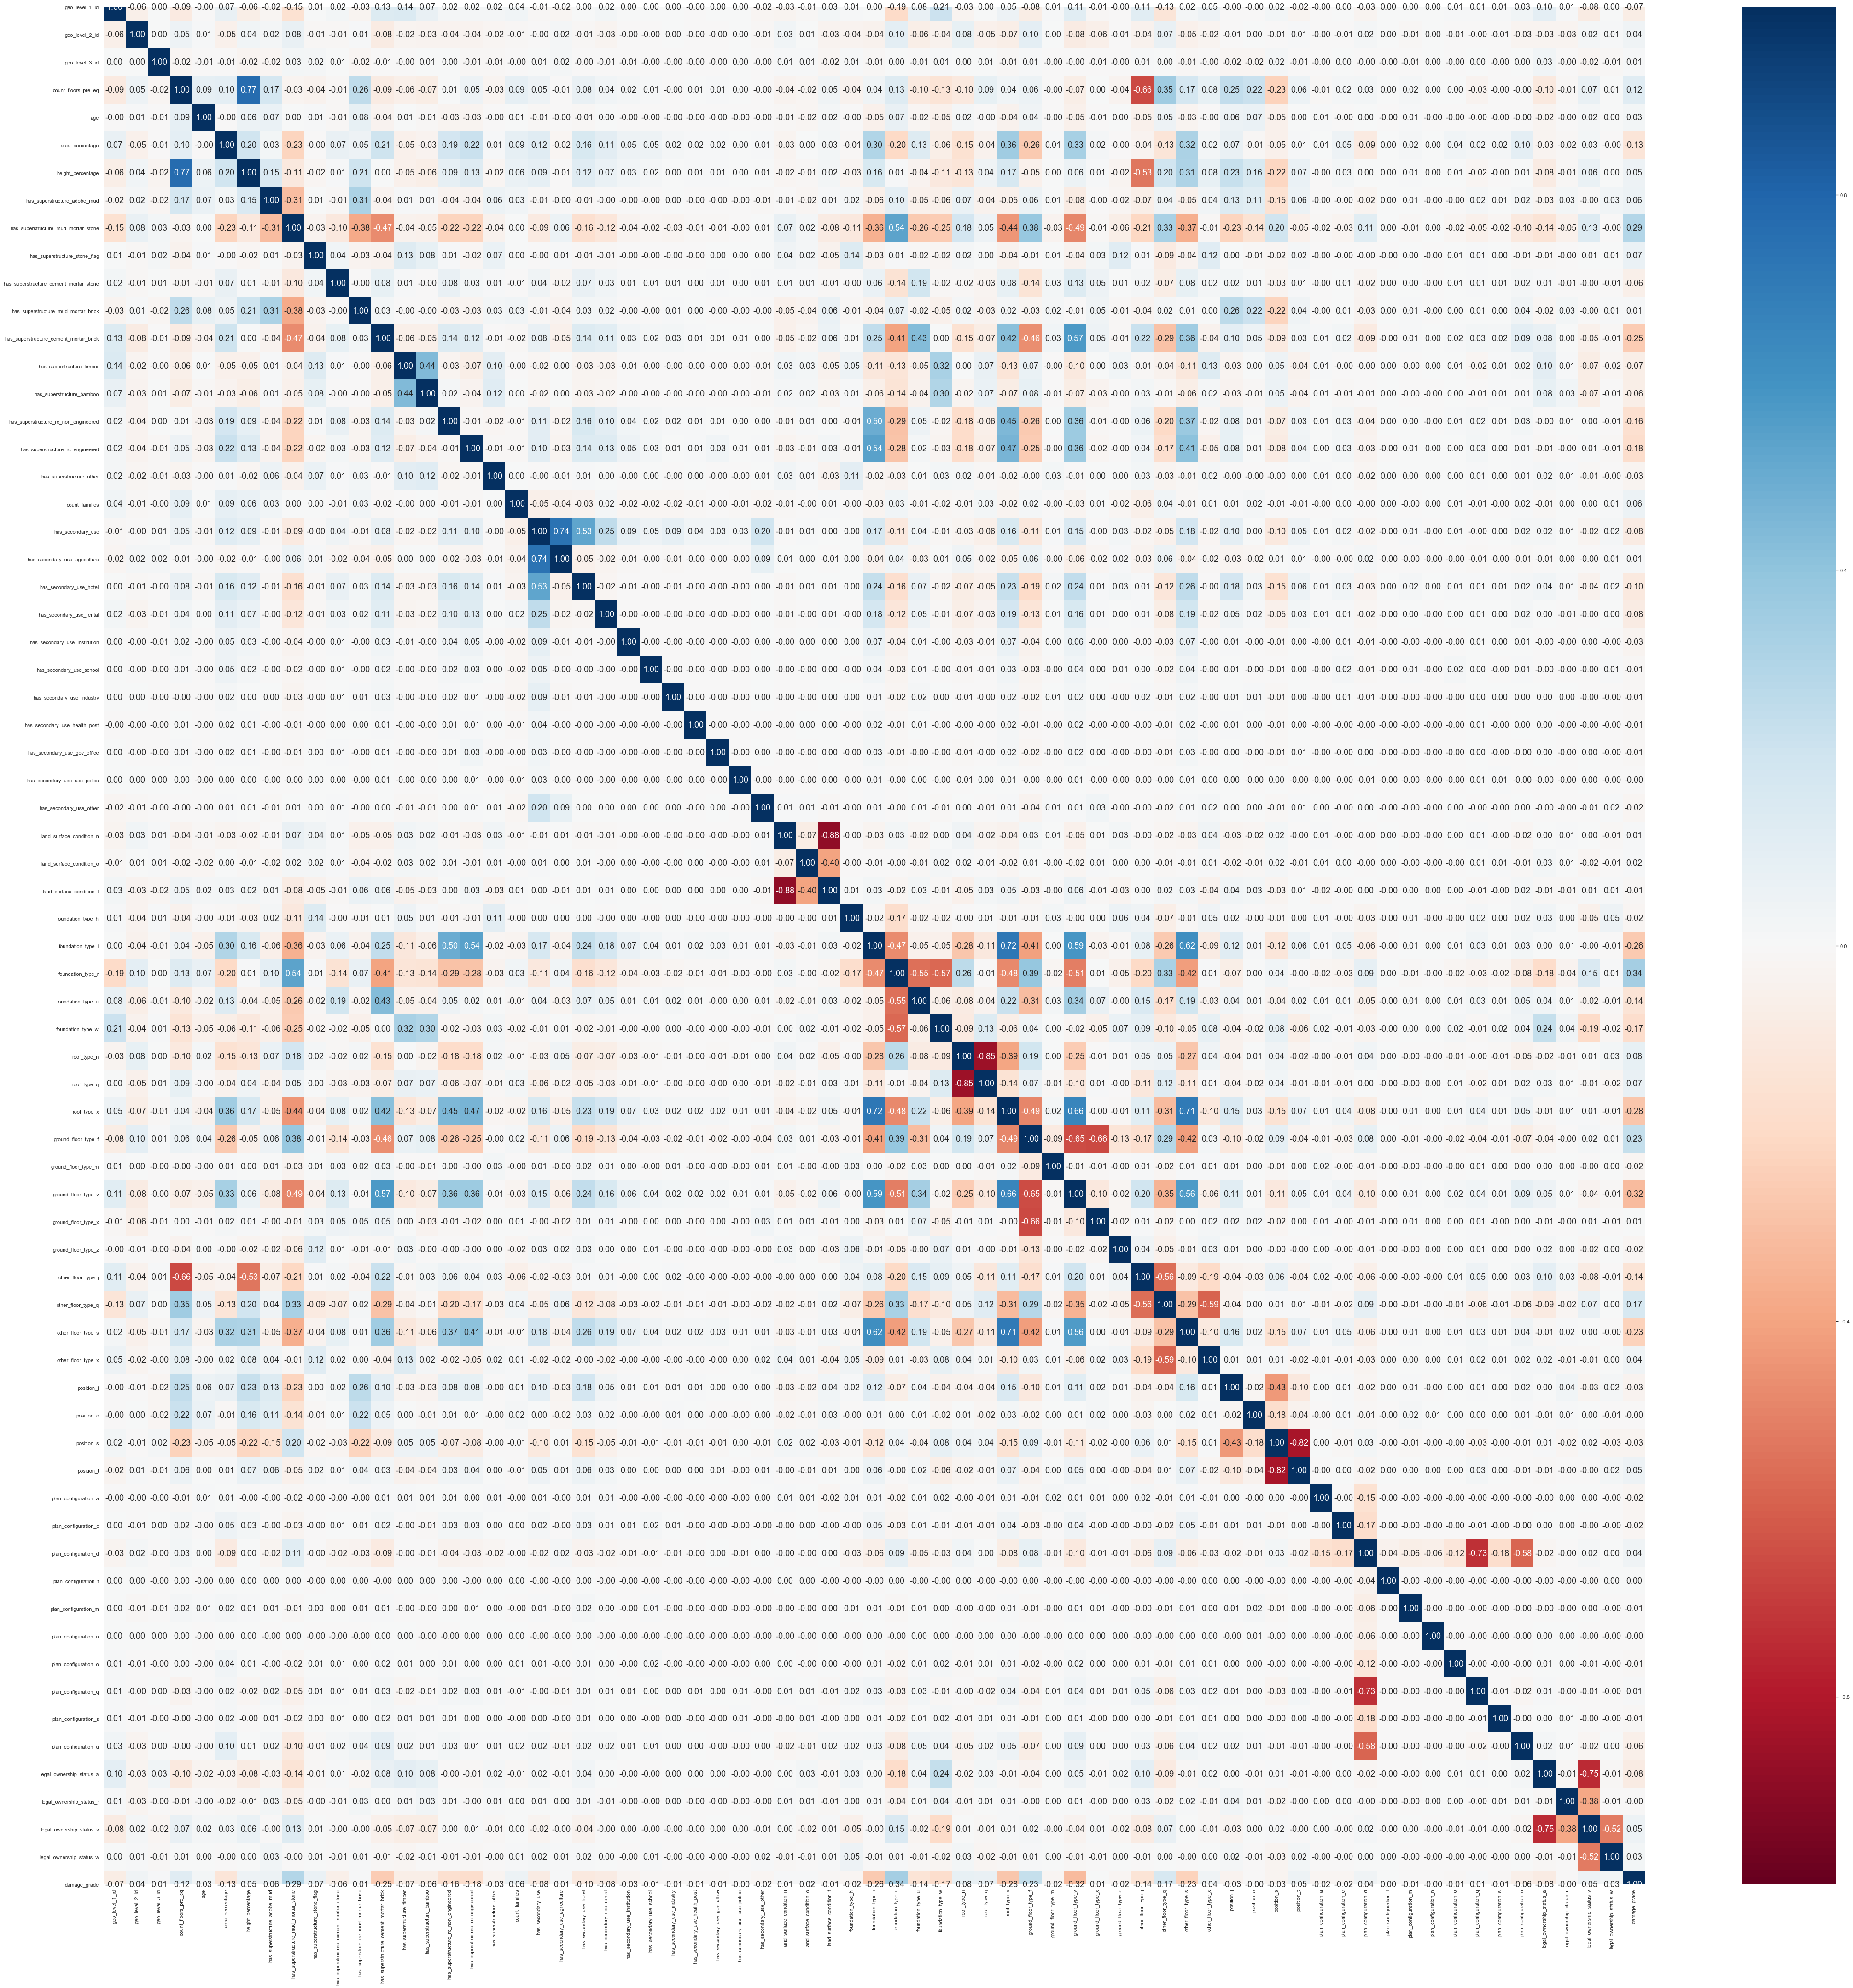

In [32]:
f, axes = plt.subplots(1,1, figsize=(75,75))
sb.heatmap(data = trainDataWithOneHotMerged.corr(),
          cmap = "RdBu", annot = True, fmt = ".2f", annot_kws = {'size': 18},
          vmin = -1, vmax = 1)

---

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [23]:
trainDataWithoutCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 30 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
has_superstructure_adobe_mud              260601 non-null bool
has_superstructure_mud_mortar_stone       260601 non-null bool
has_superstructure_stone_flag             260601 non-null bool
has_superstructure_cement_mortar_stone    260601 non-null bool
has_superstructure_mud_mortar_brick       260601 non-null bool
has_superstructure_cement_mortar_brick    260601 non-null bool
has_superstructure_timber                 260601 non-null bool

In [82]:
#forest = RandomForestClassifier(n_estimators=50, max_depth = 20)
forest = RandomForestRegressor(n_estimators=100, max_depth = 20, n_jobs=-1)
selector = RFE(forest, 10, step=1)

In [73]:
selector = selector.fit(trainDataWithoutCat, trainLabel.values.ravel())

In [74]:
selector.ranking_

array([ 1,  1,  1,  2,  1,  1,  1,  1,  1,  1, 11,  3,  6,  4,  7,  8,  9,
       13,  1,  5, 10, 12, 14, 17, 18, 16, 19, 21, 20, 15])

In [75]:
selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [76]:
columns_to_drop_rank = { list(selector.ranking_)[i]: trainDataWithoutCat.columns[i] for i in range(len(trainDataWithoutCat.columns)) if list(selector.ranking_)[i] != 1}

In [77]:
columns_to_drop = []
for i in range(len(columns_to_drop_rank)):
    columns_to_drop.append(columns_to_drop_rank[i+2])
    print(i+2, columns_to_drop_rank[i+2])

2 count_floors_pre_eq
3 has_superstructure_mud_mortar_brick
4 has_superstructure_timber
5 has_secondary_use
6 has_superstructure_cement_mortar_brick
7 has_superstructure_bamboo
8 has_superstructure_rc_non_engineered
9 has_superstructure_rc_engineered
10 has_secondary_use_agriculture
11 has_superstructure_cement_mortar_stone
12 has_secondary_use_hotel
13 has_superstructure_other
14 has_secondary_use_rental
15 has_secondary_use_other
16 has_secondary_use_industry
17 has_secondary_use_institution
18 has_secondary_use_school
19 has_secondary_use_health_post
20 has_secondary_use_use_police
21 has_secondary_use_gov_office


In [78]:
columns_to_keep = [trainDataWithoutCat.columns[i] for i in range(len(trainDataWithoutCat.columns)) if list(selector.support_)[i]]
for each in columns_to_keep:
    print(each)

geo_level_1_id
geo_level_2_id
geo_level_3_id
age
area_percentage
height_percentage
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
count_families


---

Now we do RFE for the 10 columns kept plus the OneHotEncoding of the categorical features.

In [79]:
trainDataWithOneHotAndDropped = trainDataWithOneHot.drop(columns = columns_to_drop)
trainDataWithOneHotAndDropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 48 columns):
geo_level_1_id                         260601 non-null int64
geo_level_2_id                         260601 non-null int64
geo_level_3_id                         260601 non-null int64
age                                    260601 non-null int64
area_percentage                        260601 non-null int64
height_percentage                      260601 non-null int64
has_superstructure_adobe_mud           260601 non-null bool
has_superstructure_mud_mortar_stone    260601 non-null bool
has_superstructure_stone_flag          260601 non-null bool
count_families                         260601 non-null int64
land_surface_condition_n               260601 non-null bool
land_surface_condition_o               260601 non-null bool
land_surface_condition_t               260601 non-null bool
foundation_type_h                      260601 non-null bool
foundation_type_i                      26

In [ ]:
selector = selector.fit(trainDataWithOneHotAndDropped, trainLabel.values.ravel())

In [ ]:
selector.ranking_

In [ ]:
columns_to_drop_rank = { list(selector.ranking_)[i]: trainDataWithOneHotAndDropped.columns[i] for i in range(len(trainDataWithOneHotAndDropped.columns)) if list(selector.ranking_)[i] != 1}

In [ ]:
for i in range(len(columns_to_drop_rank)):
    print(i+2, columns_to_drop_rank[i+2])

In [ ]:
columns_to_keep = [trainDataWithOneHotAndDropped.columns[i] for i in range(len(trainDataWithOneHotAndDropped.columns)) if list(selector.support_)[i]]
for each in columns_to_keep:
    print(each)

In [ ]:
trainDataFinal10Col = trainDataWithOneHotAndDropped[columns_to_keep]
trainDataFinal10Col.head()

In [83]:
selector = selector.fit(trainDataWithOneHot, trainLabel.values.ravel())

In [85]:
columns_to_drop_rank = { list(selector.ranking_)[i]: trainDataWithOneHot.columns[i] for i in range(len(trainDataWithOneHot.columns)) if list(selector.ranking_)[i] != 1}

In [93]:
col = []
for i in range(len(columns_to_drop_rank)):
    col.append(columns_to_drop_rank[i+2])
    print(i+2, columns_to_drop_rank[i+2])

2 roof_type_n
3 other_floor_type_q
4 position_s
5 has_superstructure_stone_flag
6 has_superstructure_timber
7 has_superstructure_cement_mortar_brick
8 land_surface_condition_t
9 has_secondary_use
10 foundation_type_i
11 ground_floor_type_f
12 roof_type_q
13 position_t
14 other_floor_type_x
15 land_surface_condition_n
16 has_superstructure_bamboo
17 plan_configuration_d
18 has_superstructure_mud_mortar_brick
19 ground_floor_type_v
20 legal_ownership_status_v
21 ground_floor_type_x
22 has_superstructure_adobe_mud
23 has_superstructure_rc_non_engineered
24 has_superstructure_other
25 has_secondary_use_agriculture
26 land_surface_condition_o
27 position_j
28 other_floor_type_j
29 has_secondary_use_hotel
30 has_superstructure_cement_mortar_stone
31 roof_type_x
32 plan_configuration_q
33 legal_ownership_status_a
34 foundation_type_h
35 plan_configuration_u
36 other_floor_type_s
37 foundation_type_u
38 has_secondary_use_rental
39 has_superstructure_rc_engineered
40 has_secondary_use_other
41 

In [87]:
columns_to_keep = [trainDataWithOneHot.columns[i] for i in range(len(trainDataWithOneHot.columns)) if list(selector.support_)[i]]
for each in columns_to_keep:
    print(each)

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
has_superstructure_mud_mortar_stone
count_families
foundation_type_r


In [88]:
X_train, X_test, y_train, y_test = train_test_split(trainDataWithOneHot, trainLabel, test_size=0.25)

In [94]:
train_scores = []
test_scores = []
for i in range(len(columns_to_drop_rank)):
    forest = RandomForestRegressor(n_estimators=100, max_depth = 20, n_jobs=-1)
    X = X_train[columns_to_keep + col[:i]]
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append( f1_score(y_train, pd.DataFrame(forest.predict(X_train)).round(0), average='micro') )
    test_scores.append( f1_score(y_test, pd.DataFrame(forest.predict(X_test)).round(0), average='micro') )

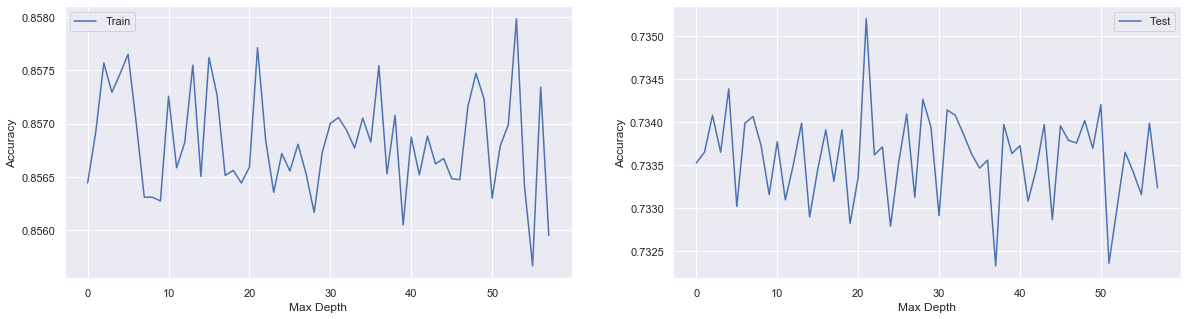

In [99]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range(len(columns_to_drop_rank)), ax = axes[0], label="Train").set(xlabel="Max Depth", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range(len(columns_to_drop_rank)), ax = axes[1], label="Test").set(xlabel="Max Depth", ylabel="Accuracy")
plt.show()

#### Now to see accuracy of model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(trainDataFinal10Col, trainLabel, test_size=0.25)

In [43]:
forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
forest.score(X_train, y_train)

0.725299525163202

In [45]:
forest.score(X_test, y_test)

0.4323319931858758

In [68]:
y_train_predicted = pd.DataFrame(forest.predict(X_train)).round(0)
y_test_predicted = pd.DataFrame(forest.predict(X_test)).round(0)

from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_predicted, average='micro'))
print(f1_score(y_test, y_test_predicted, average='micro'))

0.9410335124072653
0.6999432088532793


In [56]:
train_scores = []
test_scores = []
range_to_test = range(10,60)
for i in range_to_test:
    forest = RandomForestRegressor(n_estimators=10, max_depth = i, n_jobs=-1)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append( f1_score(y_train, pd.DataFrame(forest.predict(X_train)).round(0), average='micro') )
    test_scores.append( f1_score(y_test, pd.DataFrame(forest.predict(X_test)).round(0), average='micro') )

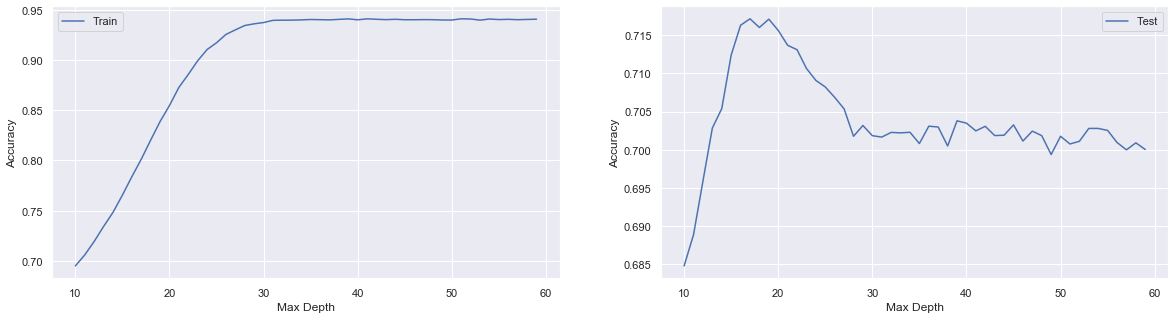

In [57]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Max Depth", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Max Depth", ylabel="Accuracy")
plt.show()

In [50]:
max_depth = 20

In [51]:
train_scores = []
test_scores = []
range_to_test = range(10,400,20)
for i in range_to_test:
    forest = RandomForestRegressor(n_estimators=i, max_depth = max_depth, n_jobs=-1)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append( f1_score(y_train, pd.DataFrame(forest.predict(X_train)).round(0), average='micro') )
    test_scores.append( f1_score(y_test, pd.DataFrame(forest.predict(X_test)).round(0), average='micro') )

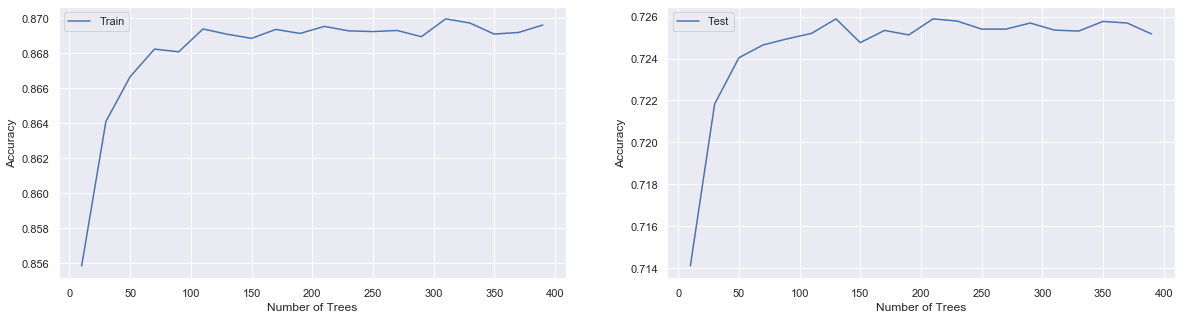

In [52]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Number of Trees", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Number of Trees", ylabel="Accuracy")
plt.show()

In [94]:
train_scores = []
test_scores = []
range_to_test = range(10,60)
for i in range_to_test:
    forest = RandomForestClassifier(n_estimators=10, max_depth = i)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Max Depth')]

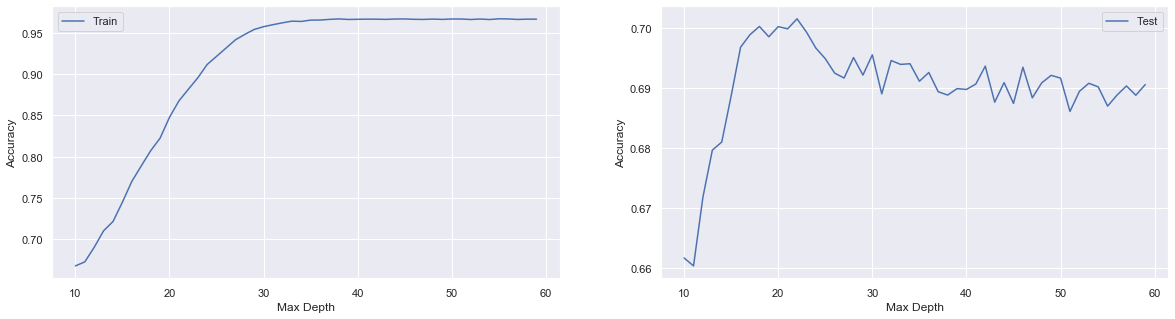

In [97]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Max Depth", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Max Depth", ylabel="Accuracy")

Set max depth to 20

In [91]:
max_depth = 20

In [101]:
train_scores = []
test_scores = []
range_to_test = range(10,50)
for i in range_to_test:
    forest = RandomForestClassifier(n_estimators=i, max_depth = max_depth)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Max Depth')]

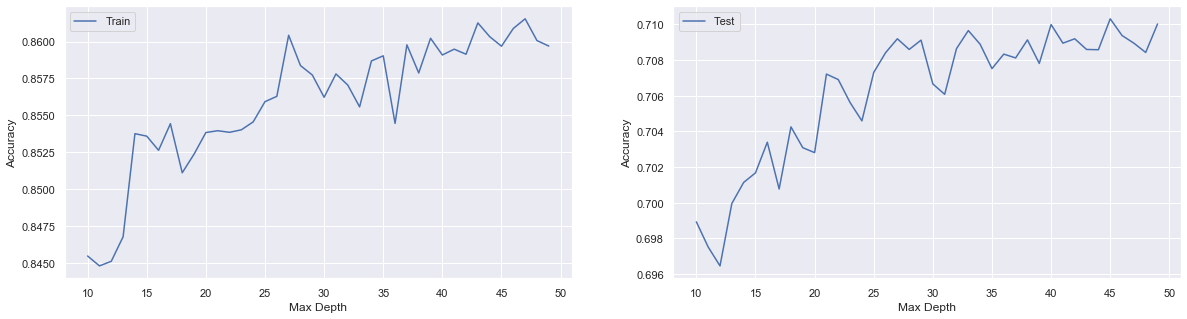

In [102]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Number of Trees", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Number of Trees", ylabel="Accuracy")

In [103]:
train_scores = []
test_scores = []
range_to_test = range(50,100)
for i in range_to_test:
    forest = RandomForestClassifier(n_estimators=i, max_depth = max_depth)
    forest.fit(X_train, y_train.values.ravel())
    train_scores.append(forest.score(X_train, y_train))
    test_scores.append(forest.score(X_test, y_test))

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Number of Trees')]

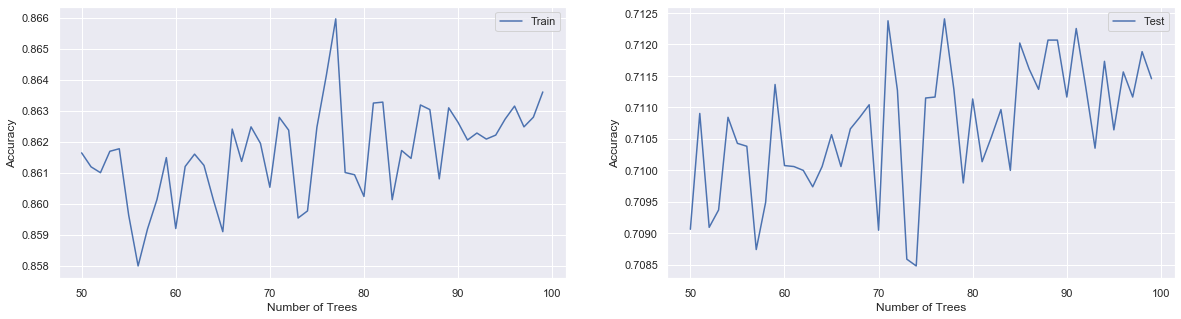

In [105]:
f, axes = plt.subplots(1,2, figsize=(20,5))

sb.lineplot(y=train_scores, x=range_to_test, ax = axes[0], label="Train").set(xlabel="Number of Trees", ylabel="Accuracy")
sb.lineplot(y=test_scores, x=range_to_test, ax = axes[1], label="Test").set(xlabel="Number of Trees", ylabel="Accuracy")

In [1]:
forest = RandomForestClassifier(n_estimators=500, max_depth = max_depth)
forest.fit(X_train, y_train.values.ravel())
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

NameError: name 'RandomForestClassifier' is not defined